In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np

In [2]:
# Download the dataset
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
print(f"X_train.shape => {X_train.shape}")
print(f"X_test.shape => {X_test.shape}")
print(f"Y_train.shape => {Y_train.shape}")
print(f"Y_test.shape => {Y_test.shape}")

X_train.shape => (60000, 28, 28)
X_test.shape => (10000, 28, 28)
Y_train.shape => (60000,)
Y_test.shape => (10000,)


In [4]:
INPUT_DIM = X_train.shape[1]*X_train.shape[2]
LATENT_VEC_DIM = 2

In [8]:
X_train = np.reshape(X_train, (-1, INPUT_DIM))
X_test = np.reshape(X_test, (-1, INPUT_DIM))
print(f"X_train.shape => {X_train.shape}")
print(f"X_test.shape => {X_test.shape}")

X_train.shape => (60000, 784)
X_test.shape => (10000, 784)


In [5]:
input_layer = Input(shape=(INPUT_DIM,))

# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(LATENT_VEC_DIM, activation='tanh')(input_layer)
encoder = enc_layer_1

# Then build the decoder
dec_layer_1 = Dense(INPUT_DIM, activation='sigmoid')(encoder)
decoder = dec_layer_1

# Connect both encoder and decoder
autoencoder = Model(input_layer, decoder, name='Autoencoder_1')

# Latent representation (Optional)
latent_model = Model(input_layer, encoder)

# Get summary
autoencoder.summary()


Model: "Autoencoder_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 784)               2352      
                                                                 
Total params: 3922 (15.32 KB)
Trainable params: 3922 (15.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/70
30/30 [==============================] - 2s 34ms/step - loss: 0.2628 - val_loss: 0.2625
Epoch 2/70
30/30 [==============================] - 1s 30ms/step - loss: 0.2628 - val_loss: 0.2625
Epoch 3/70
30/30 [==============================] - 1s 30ms/step - loss: 0.2628 - val_loss: 0.2625
Epoch 4/70
30/30 [==============================] - 1s 30ms/step - loss: 0.2628 - val_loss: 0.2625
Epoch 5/70
30/30 [==============================] - 1s 32ms/step - loss: 0.2628 - val_loss: 0.2625
Epoch 6/70
30/30 [==============================] - 1s 31ms/step - loss: 0.2628 - val_loss: 0.2625
Epoch 7/70
30/30 [==============================] - 1s 36ms/step - loss: 0.2628 - val_loss: 0.2625
Epoch 8/70
30/30 [==============================] - 1s 33ms/step - loss: 0.2628 - val_loss: 0.2625
Epoch 9/70
30/30 [==============================] - 1s 31ms/step - loss: 0.2628 - val_loss: 0.2625
Epoch 10/70
30/30 [==============================] - 1s 32ms/step - loss: 0.2628 - val_loss: 0.2625
Epoch 11/

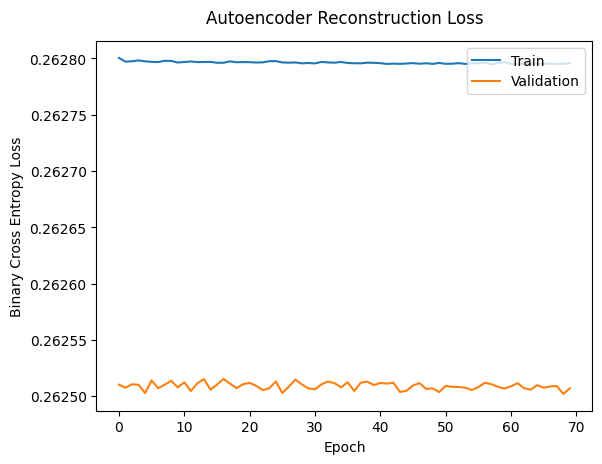

In [11]:
# Compile the autoencoder model
import matplotlib.pyplot as plt
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Train the autoencoder with MNIST data
history = autoencoder.fit(X_train, X_train, epochs=70, batch_size=64,
                          shuffle=True, validation_data=(X_test, X_test))

# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

313/313 [==============================] - 0s 1ms/step


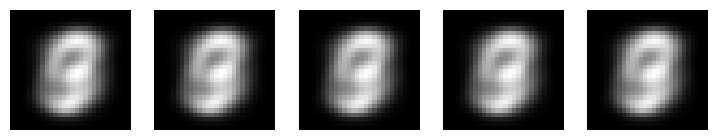

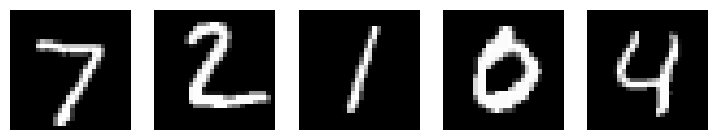

In [15]:
# Testing the model by reconstructing
reconstructed_images = autoencoder.predict(X_test)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
    ax.axis('off')

plt.show()

plt.figure(figsize=(9, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis('off')

plt.show()

313/313 [==============================] - 0s 935us/step


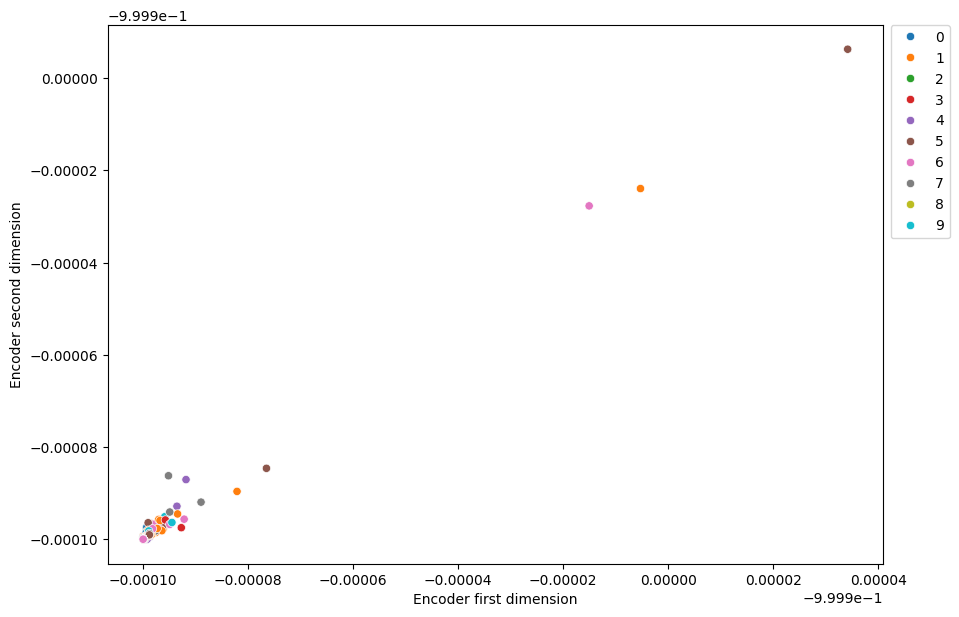

In [19]:
import seaborn as sns
latent_representation = latent_model.predict(X_test)


plt.figure(figsize=(10, 7))

sns.scatterplot(x=latent_representation[:, 0],
                y=latent_representation[:, 1],
                hue=Y_test, palette='tab10')

plt.xlabel("Encoder first dimension")
plt.ylabel("Encoder second dimension")

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

## 2


In [20]:
input_layer = Input(shape=(INPUT_DIM,))

# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(10, activation='sigmoid')(input_layer)
enc_layer_2 = Dense(LATENT_VEC_DIM, activation='tanh')(enc_layer_1)
encoder = enc_layer_2

# Then build the decoder
dec_layer_1 = Dense(10, activation='sigmoid')(encoder)
dec_layer_2 = Dense(INPUT_DIM, activation='sigmoid')(dec_layer_1)
decoder = dec_layer_2

# Connect both encoder and decoder
autoencoder = Model(input_layer, decoder, name='Autoencoder_2')

# Latent representation (Optional)
latent_model = Model(input_layer, encoder)

# Get summary
autoencoder.summary()

Model: "Autoencoder_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 784)               8624      
                                                                 
Total params: 16526 (64.55 KB)
Trainable params: 16526 (64.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/70
938/938 [==============================] - 3s 2ms/step - loss: 0.3409 - val_loss: 0.2691
Epoch 2/70
938/938 [==============================] - 2s 2ms/step - loss: 0.2659 - val_loss: 0.2640
Epoch 3/70
938/938 [==============================] - 2s 2ms/step - loss: 0.2637 - val_loss: 0.2631
Epoch 4/70
938/938 [==============================] - 2s 2ms/step - loss: 0.2632 - val_loss: 0.2629
Epoch 5/70
938/938 [==============================] - 2s 2ms/step - loss: 0.2630 - val_loss: 0.2627
Epoch 6/70
938/938 [==============================] - 2s 2ms/step - loss: 0.2629 - val_loss: 0.2626
Epoch 7/70
938/938 [==============================] - 2s 3ms/step - loss: 0.2629 - val_loss: 0.2626
Epoch 8/70
938/938 [==============================] - 2s 2ms/step - loss: 0.2629 - val_loss: 0.2626
Epoch 9/70
938/938 [==============================] - 2s 3ms/step - loss: 0.2629 - val_loss: 0.2627
Epoch 10/70
938/938 [==============================] - 3s 3ms/step - loss: 0.2629 - val_loss: 0.2625

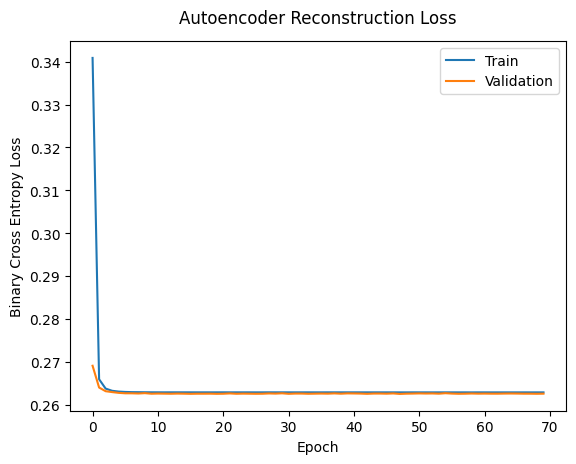

In [21]:
# Compile the autoencoder model
import matplotlib.pyplot as plt
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Train the autoencoder with MNIST data
history = autoencoder.fit(X_train, X_train, epochs=70, batch_size=64,
                          shuffle=True, validation_data=(X_test, X_test))

# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

313/313 [==============================] - 1s 1ms/step


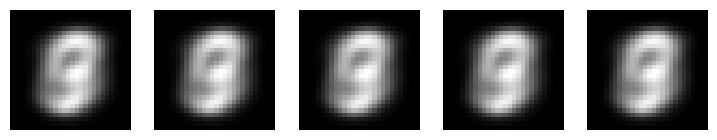

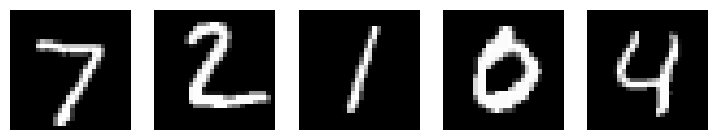

In [22]:
# Testing the model by reconstructing
reconstructed_images = autoencoder.predict(X_test)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
    ax.axis('off')

plt.show()

plt.figure(figsize=(9, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis('off')

plt.show()

313/313 [==============================] - 0s 925us/step


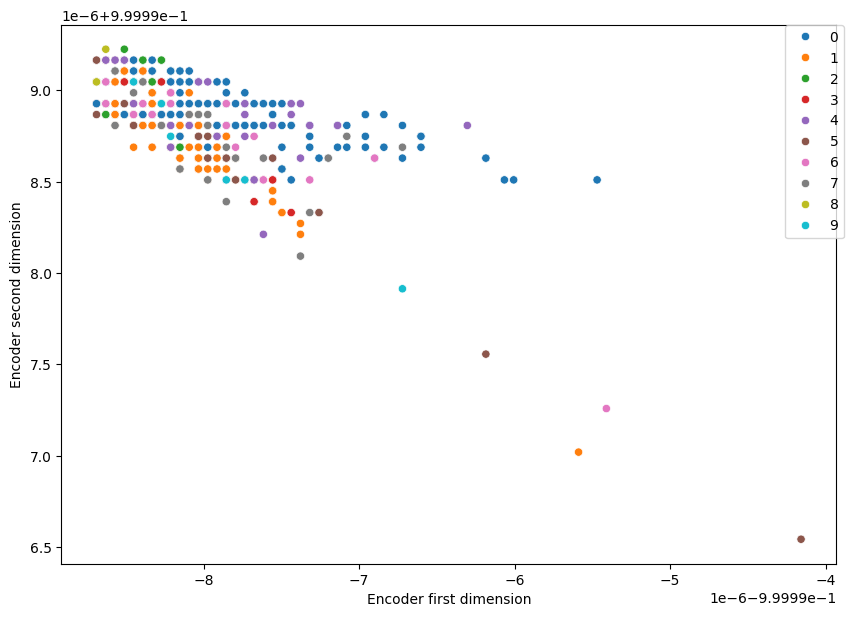

In [23]:
import seaborn as sns
latent_representation = latent_model.predict(X_test)


plt.figure(figsize=(10, 7))

sns.scatterplot(x=latent_representation[:, 0],
                y=latent_representation[:, 1],
                hue=Y_test, palette='tab10')

plt.xlabel("Encoder first dimension")
plt.ylabel("Encoder second dimension")

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

#3


In [25]:
input_dim = 28*28
latent_vec_dim = 2

input_layer = Input(shape=(input_dim,))

# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(32, activation='sigmoid')(input_layer)
enc_layer_2 = Dense(10, activation='sigmoid')(enc_layer_1)
enc_layer_3 = Dense(latent_vec_dim, activation='tanh')(enc_layer_2)
encoder = enc_layer_3

# Then build the decoder
dec_layer_1 = Dense(10, activation='sigmoid')(encoder)
dec_layer_2 = Dense(32, activation='sigmoid')(dec_layer_1)
dec_layer_3 = Dense(input_dim, activation='sigmoid')(dec_layer_2)
decoder = dec_layer_3

# Connect both encoder and decoder
autoencoder = Model(input_layer, decoder, name='Autoencoder_3')

# Latent representation (Optional)
latent_model = Model(input_layer, encoder)

# Get summary
autoencoder.summary()

Model: "Autoencoder_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
 dense_8 (Dense)             (None, 2)                 22        
                                                                 
 dense_9 (Dense)             (None, 10)                30        
                                                                 
 dense_10 (Dense)            (None, 32)                352       
                                                                 
 dense_11 (Dense)            (None, 784)             

Epoch 1/70
938/938 [==============================] - 4s 3ms/step - loss: 0.2924 - val_loss: 0.2633
Epoch 2/70
938/938 [==============================] - 3s 3ms/step - loss: 0.2633 - val_loss: 0.2628
Epoch 3/70
938/938 [==============================] - 3s 3ms/step - loss: 0.2631 - val_loss: 0.2628
Epoch 4/70
938/938 [==============================] - 3s 3ms/step - loss: 0.2587 - val_loss: 0.2518
Epoch 5/70
938/938 [==============================] - 3s 3ms/step - loss: 0.2455 - val_loss: 0.2417
Epoch 6/70
938/938 [==============================] - 3s 3ms/step - loss: 0.2404 - val_loss: 0.2379
Epoch 7/70
938/938 [==============================] - 3s 3ms/step - loss: 0.2369 - val_loss: 0.2348
Epoch 8/70
938/938 [==============================] - 3s 3ms/step - loss: 0.2292 - val_loss: 0.2221
Epoch 9/70
938/938 [==============================] - 3s 3ms/step - loss: 0.2208 - val_loss: 0.2177
Epoch 10/70
938/938 [==============================] - 3s 3ms/step - loss: 0.2169 - val_loss: 0.2143

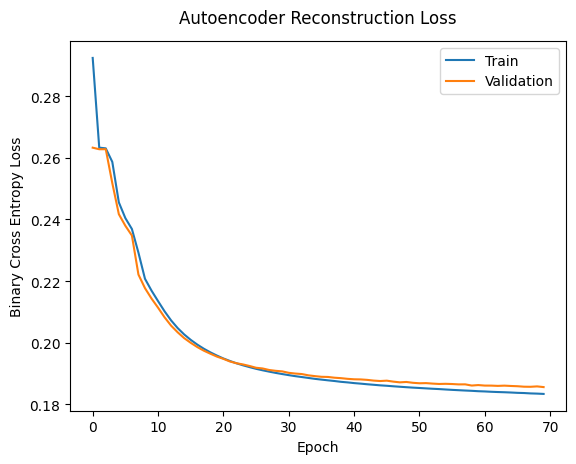

In [26]:
# Compile the autoencoder model
import matplotlib.pyplot as plt
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Train the autoencoder with MNIST data
history = autoencoder.fit(X_train, X_train, epochs=70, batch_size=64,
                          shuffle=True, validation_data=(X_test, X_test))

# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

313/313 [==============================] - 0s 1ms/step


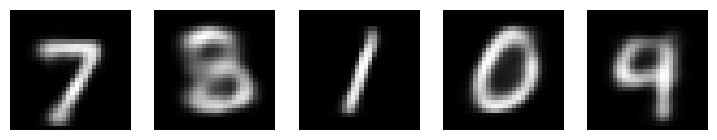

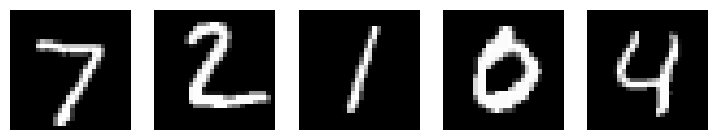

In [27]:
# Testing the model by reconstructing
reconstructed_images = autoencoder.predict(X_test)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
    ax.axis('off')

plt.show()

plt.figure(figsize=(9, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis('off')

plt.show()

313/313 [==============================] - 0s 955us/step


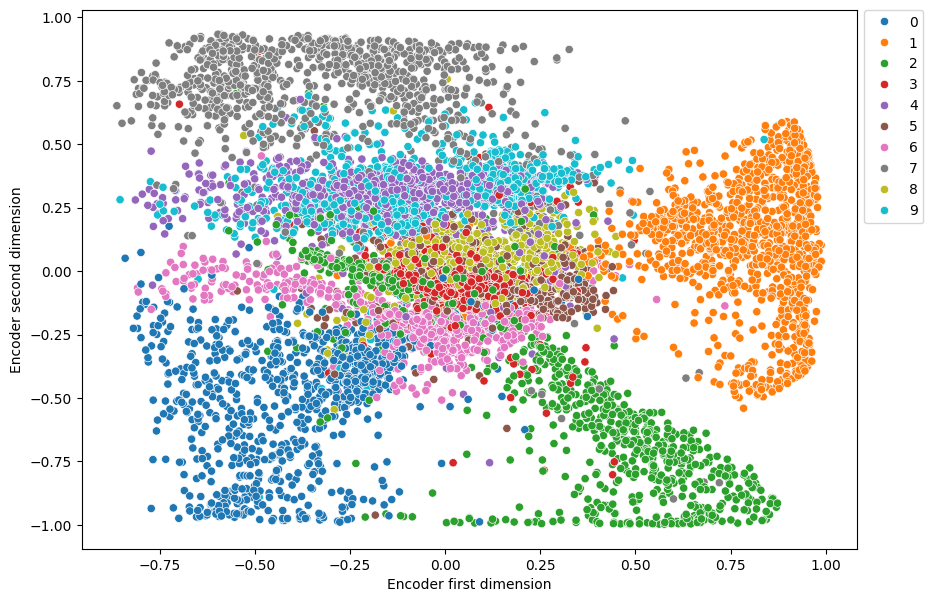

In [28]:
import seaborn as sns
latent_representation = latent_model.predict(X_test)


plt.figure(figsize=(10, 7))

sns.scatterplot(x=latent_representation[:, 0],
                y=latent_representation[:, 1],
                hue=Y_test, palette='tab10')

plt.xlabel("Encoder first dimension")
plt.ylabel("Encoder second dimension")

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)